In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# change current working directory before loading custom modules
import os
current_directory = os.getcwd()
home_dir = current_directory.split("notebooks")[0]
data_dir = os.path.join(home_dir, "data")
os.chdir(home_dir)

In [3]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import warnings
from tools.figures import subplot_barplot, kdeplot_custom, plot_corr_matrix
from tools.useful_stats import find_outliers_by_std, find_outliers_by_iqr, compute_khi2_test
#pio.renderers.default='notebook'

warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'C:\\Users\\vnarv\\PycharmProjects\\wine_quality'

### 1) read data

In [5]:
# read data
df_raw = pd.read_csv(os.path.join(data_dir, "wine-quality-white-and-red.csv"))

In [6]:
# chekc shape and data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 2)  Data checks
- 2.1) Perfect duplicates
- 2.2) NaN values
- 2.3) Nb of unique values
- 2.4) Check outliers

### 2.1)  Check perfect duplicates

In [9]:
if df_raw.shape != df_raw.drop_duplicates().shape:
    print(f"There are perfect duplicates in df:")
    print(f"df.shape = {df_raw.shape}, df.drop_duplicates.shape = {df_raw.drop_duplicates().shape}")
    df_raw.duplicated(df_raw.columns, keep=False)
    df_raw = df_raw.sort_values(by=df_raw.columns.tolist())
    display(df_raw[df_raw.duplicated(df_raw.columns, keep=False)])
else:
    print("There are none perfect duplicates")

There are perfect duplicates in df:
df.shape = (6497, 13), df.drop_duplicates.shape = (5320, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5040,red,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
5042,red,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
5029,red,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
5030,red,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
6386,red,5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,white,9.4,0.28,0.30,1.6,0.045,36.0,139.0,0.99534,3.11,0.49,9.3,5
3094,white,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,6
3095,white,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,6
1372,white,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.99800,2.87,0.68,9.5,6


In [10]:
df_dedup = df_raw.drop_duplicates()
df_dedup.shape

(5320, 13)

### 2.2) Check NaN values

In [11]:
check_nan = df_dedup.isna().sum()

### 2.3) Check nb of unique values

In [12]:
# dropna = True by default
df_dedup.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [13]:
for col in df_dedup.columns:
    print(f"==={col}:")
    unique_vals = df_dedup[col].value_counts()
    print(unique_vals[unique_vals < 10])

===type:
Series([], Name: type, dtype: int64)
===fixed acidity:
10.70    9
4.80     9
10.80    8
11.10    8
12.50    7
12.00    7
4.70     6
4.90     6
11.20    5
11.40    5
11.30    5
10.90    5
11.80    4
12.40    4
12.60    4
11.70    3
13.30    3
11.00    3
12.20    3
12.30    3
12.70    3
12.80    3
4.40     3
4.20     2
15.60    2
4.60     2
12.90    2
13.20    2
13.00    2
13.40    1
3.90     1
7.15     1
6.45     1
6.15     1
12.10    1
4.50     1
3.80     1
13.50    1
15.90    1
15.50    1
15.00    1
14.30    1
14.00    1
13.80    1
13.70    1
14.20    1
Name: fixed acidity, dtype: int64
===volatile acidity:
0.715    9
0.780    9
0.255    9
0.110    9
0.785    8
        ..
0.825    1
0.950    1
0.405    1
1.115    1
0.930    1
Name: volatile acidity, Length: 126, dtype: int64
===citric acid:
0.71    8
0.61    7
1.00    6
0.73    6
0.67    6
0.69    6
0.72    6
0.70    5
0.79    3
0.78    3
0.76    3
0.81    2
0.82    2
0.75    1
0.91    1
0.99    1
0.86    1
1.66    1
0.80    

### 2.4) Check outliers
- Outlier points can also be pinpoint as values that are at least 3 standard deviations far from the mean
- or outside the IQR boundaries (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) 

In [14]:
find_outliers_by_std(df_dedup.select_dtypes(np.number))
find_outliers_by_iqr(df_dedup.select_dtypes(np.number))

Outliers Check: More than 3 std far from mean
            fixed acidity .... 193 observations (3.6%)
            
            volatile acidity .... 330 observations (6.2%)
            
            citric acid .... 581 observations (10.9%)
            
            residual sugar .... 4348 observations (81.7%)
            
            chlorides .... 1158 observations (21.8%)
            
            free sulfur dioxide .... 3494 observations (65.7%)
            
            total sulfur dioxide .... 3622 observations (68.1%)
            
            alcohol .... 37 observations (0.7%)
            
            quality .... 5 observations (0.1%)
            
Outliers Check: IQR method
            fixed acidity .... 304 observations (5.7%)
            
            volatile acidity .... 279 observations (5.2%)
            
            citric acid .... 143 observations (2.7%)
            
            residual sugar .... 141 observations (2.7%)
            
            chlorides .... 237 obser

- Both methods show that there are outlier values. These values could be dropped, or replace by the mean or median values.
- On a real world case, we could think of finding out with an expert if these values are really extreme and unusual in wines.

## 3) Split categorical and numeric variables

In [15]:
# correct data types
df_dedup["quality"] = df_dedup["quality"].astype("category")
df_dedup["type"] = df_dedup["type"].astype("category")

In [16]:
# split categorical and numeric variables
target = "type"
df_y = df_dedup[[target]]
df_x = df_dedup.drop(target, axis=1)
df_numeric = df_x.select_dtypes(include=np.number)
df_categ = df_x.select_dtypes(include="category")

print(f"Numeric variables : {df_numeric.columns.tolist()}\n\n")
print(f"Categorical variables : {df_categ.columns.tolist()}\n\n")
print(f"Target variable : {target}\n\n")

Numeric variables : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Categorical variables : ['quality']


Target variable : type




## 4) Univariate distributions 
- 4.1) Target distribution
- 4.2) Numeric variables distribution
- 4.3) Categorical variables distribution

### 4.1) Target distribution

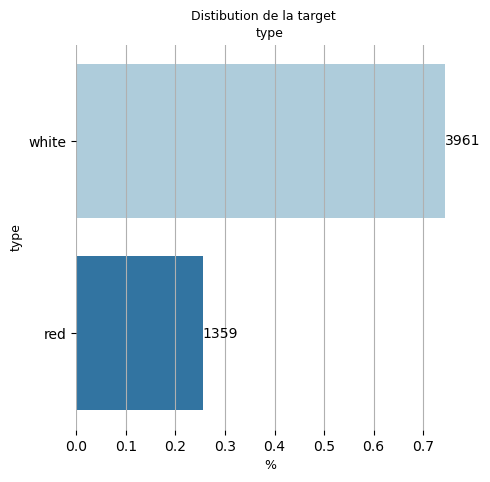

In [17]:
subplot_barplot(df_y, 1, "Distibution de la target")

### 4.2)  Explore numeric variables

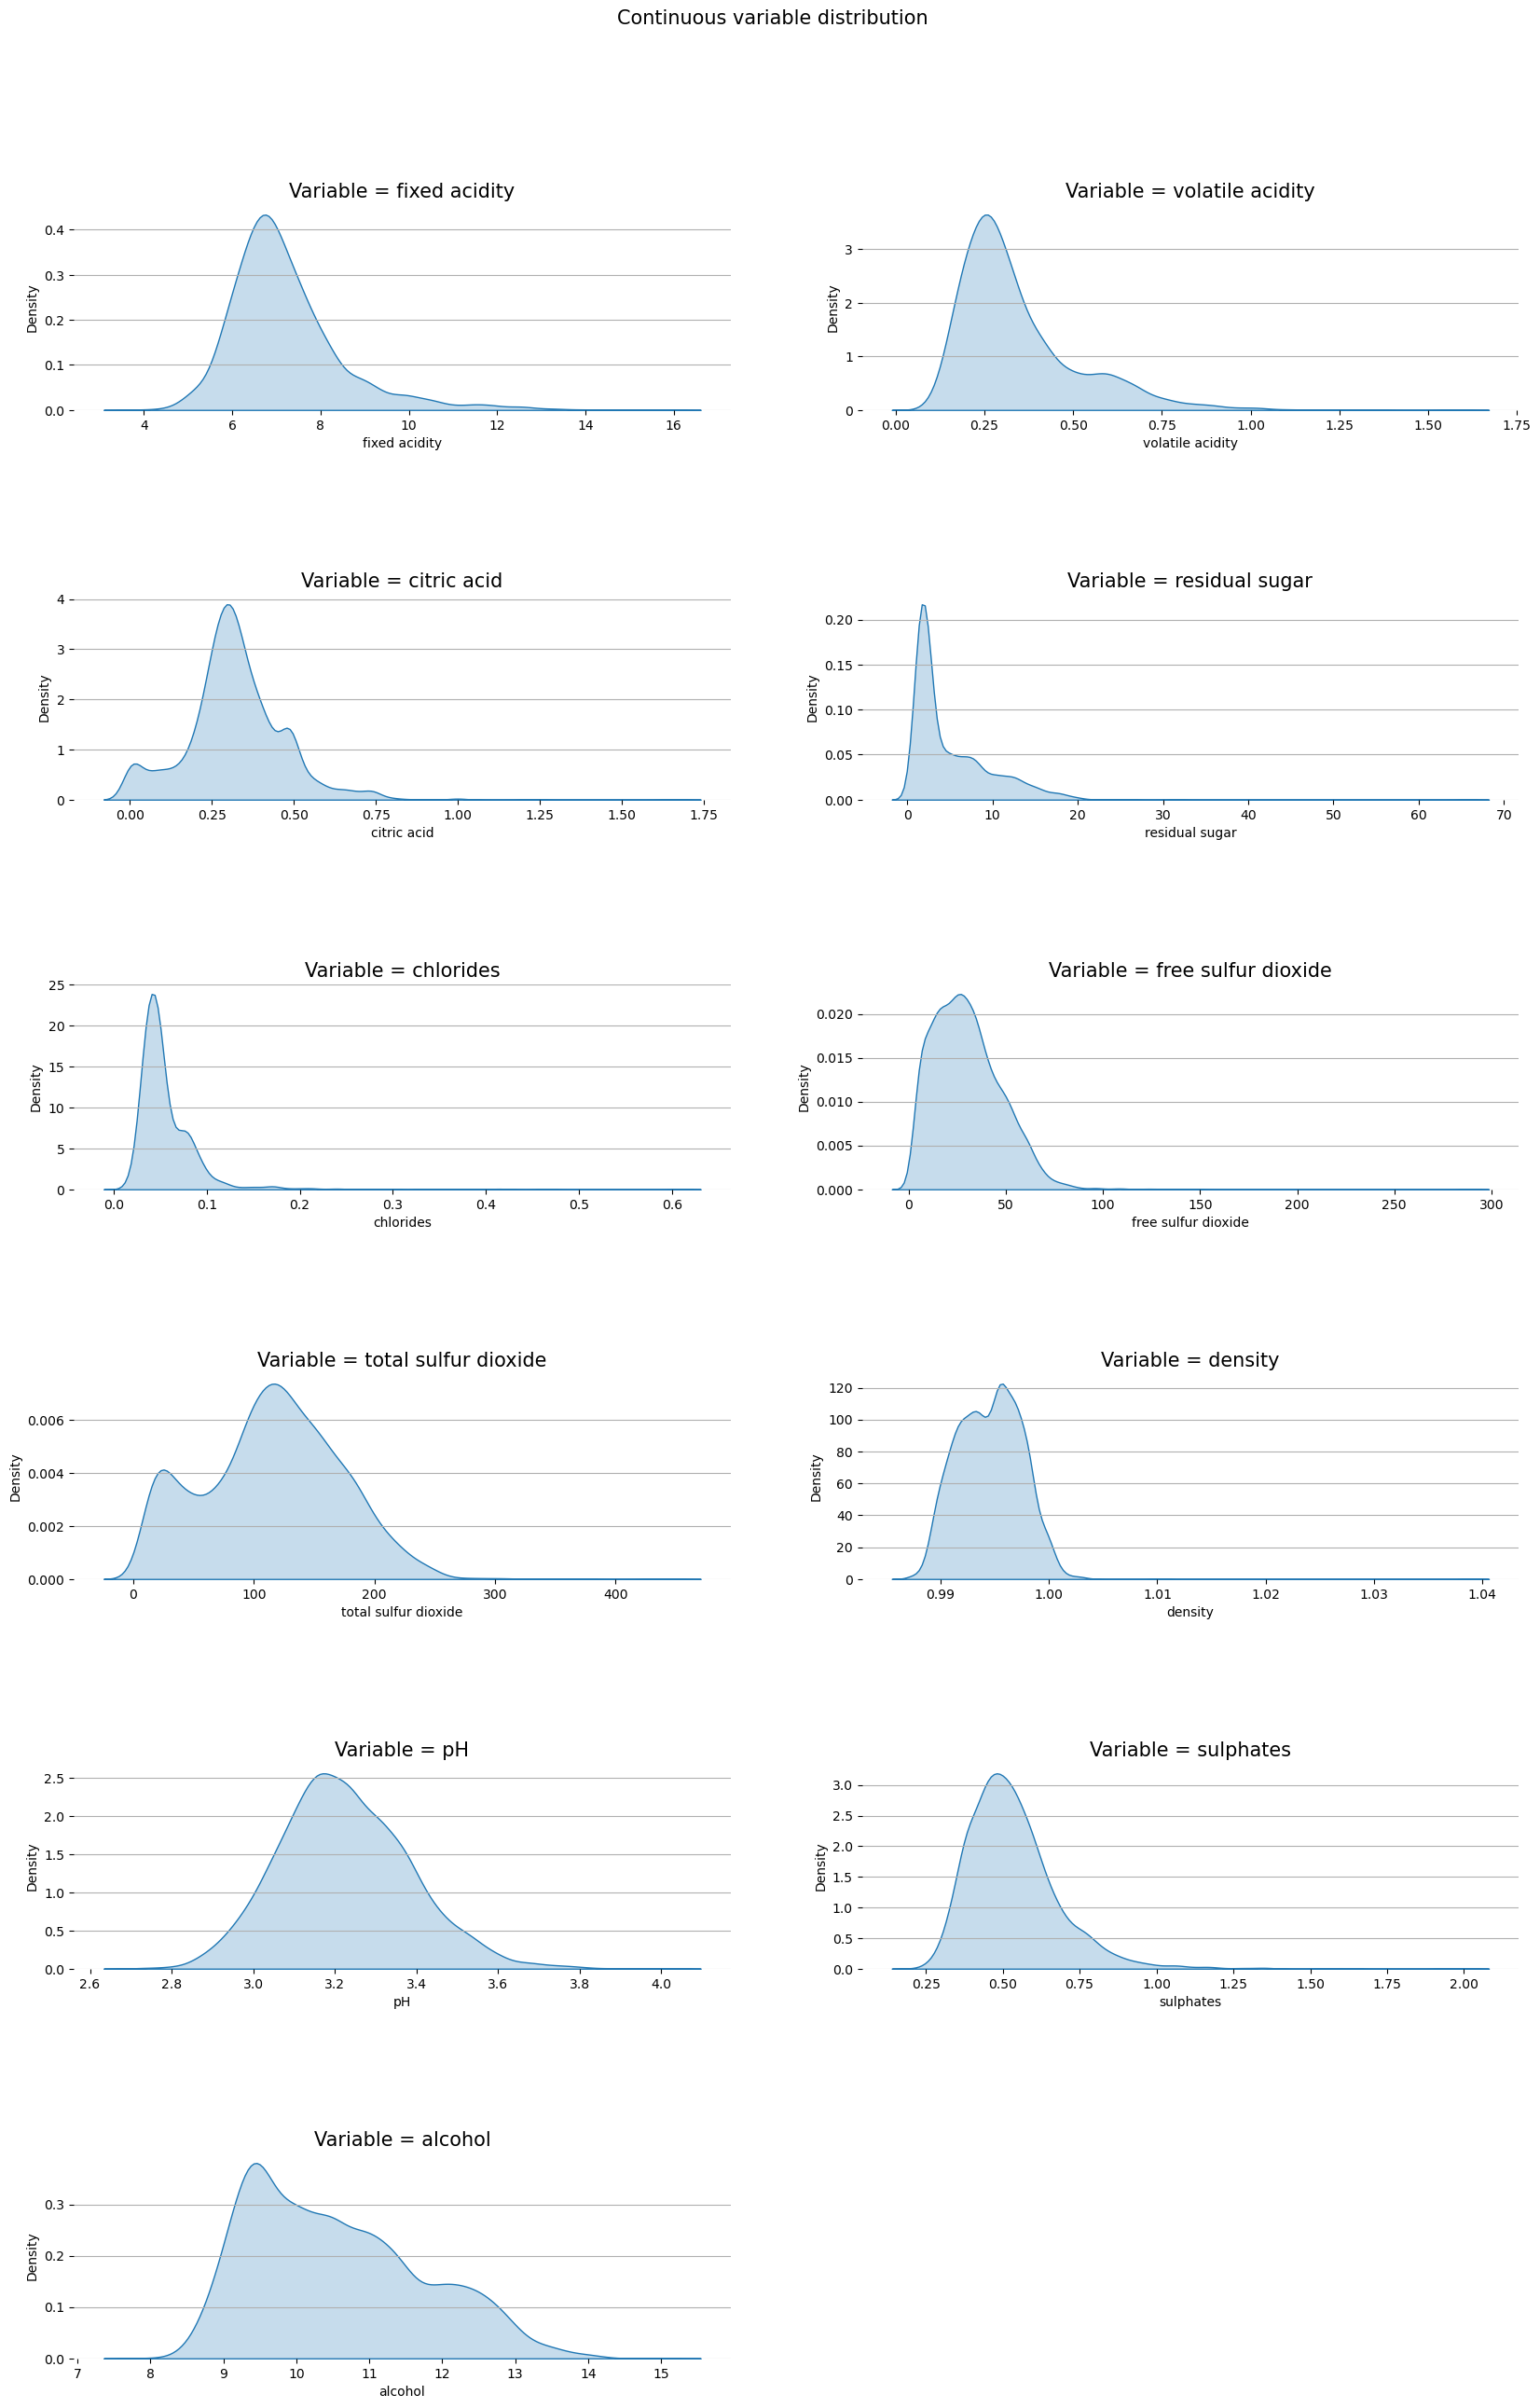

In [18]:
kdeplot_custom(df_numeric, None, 2,  "Continuous variable distribution", "kde")

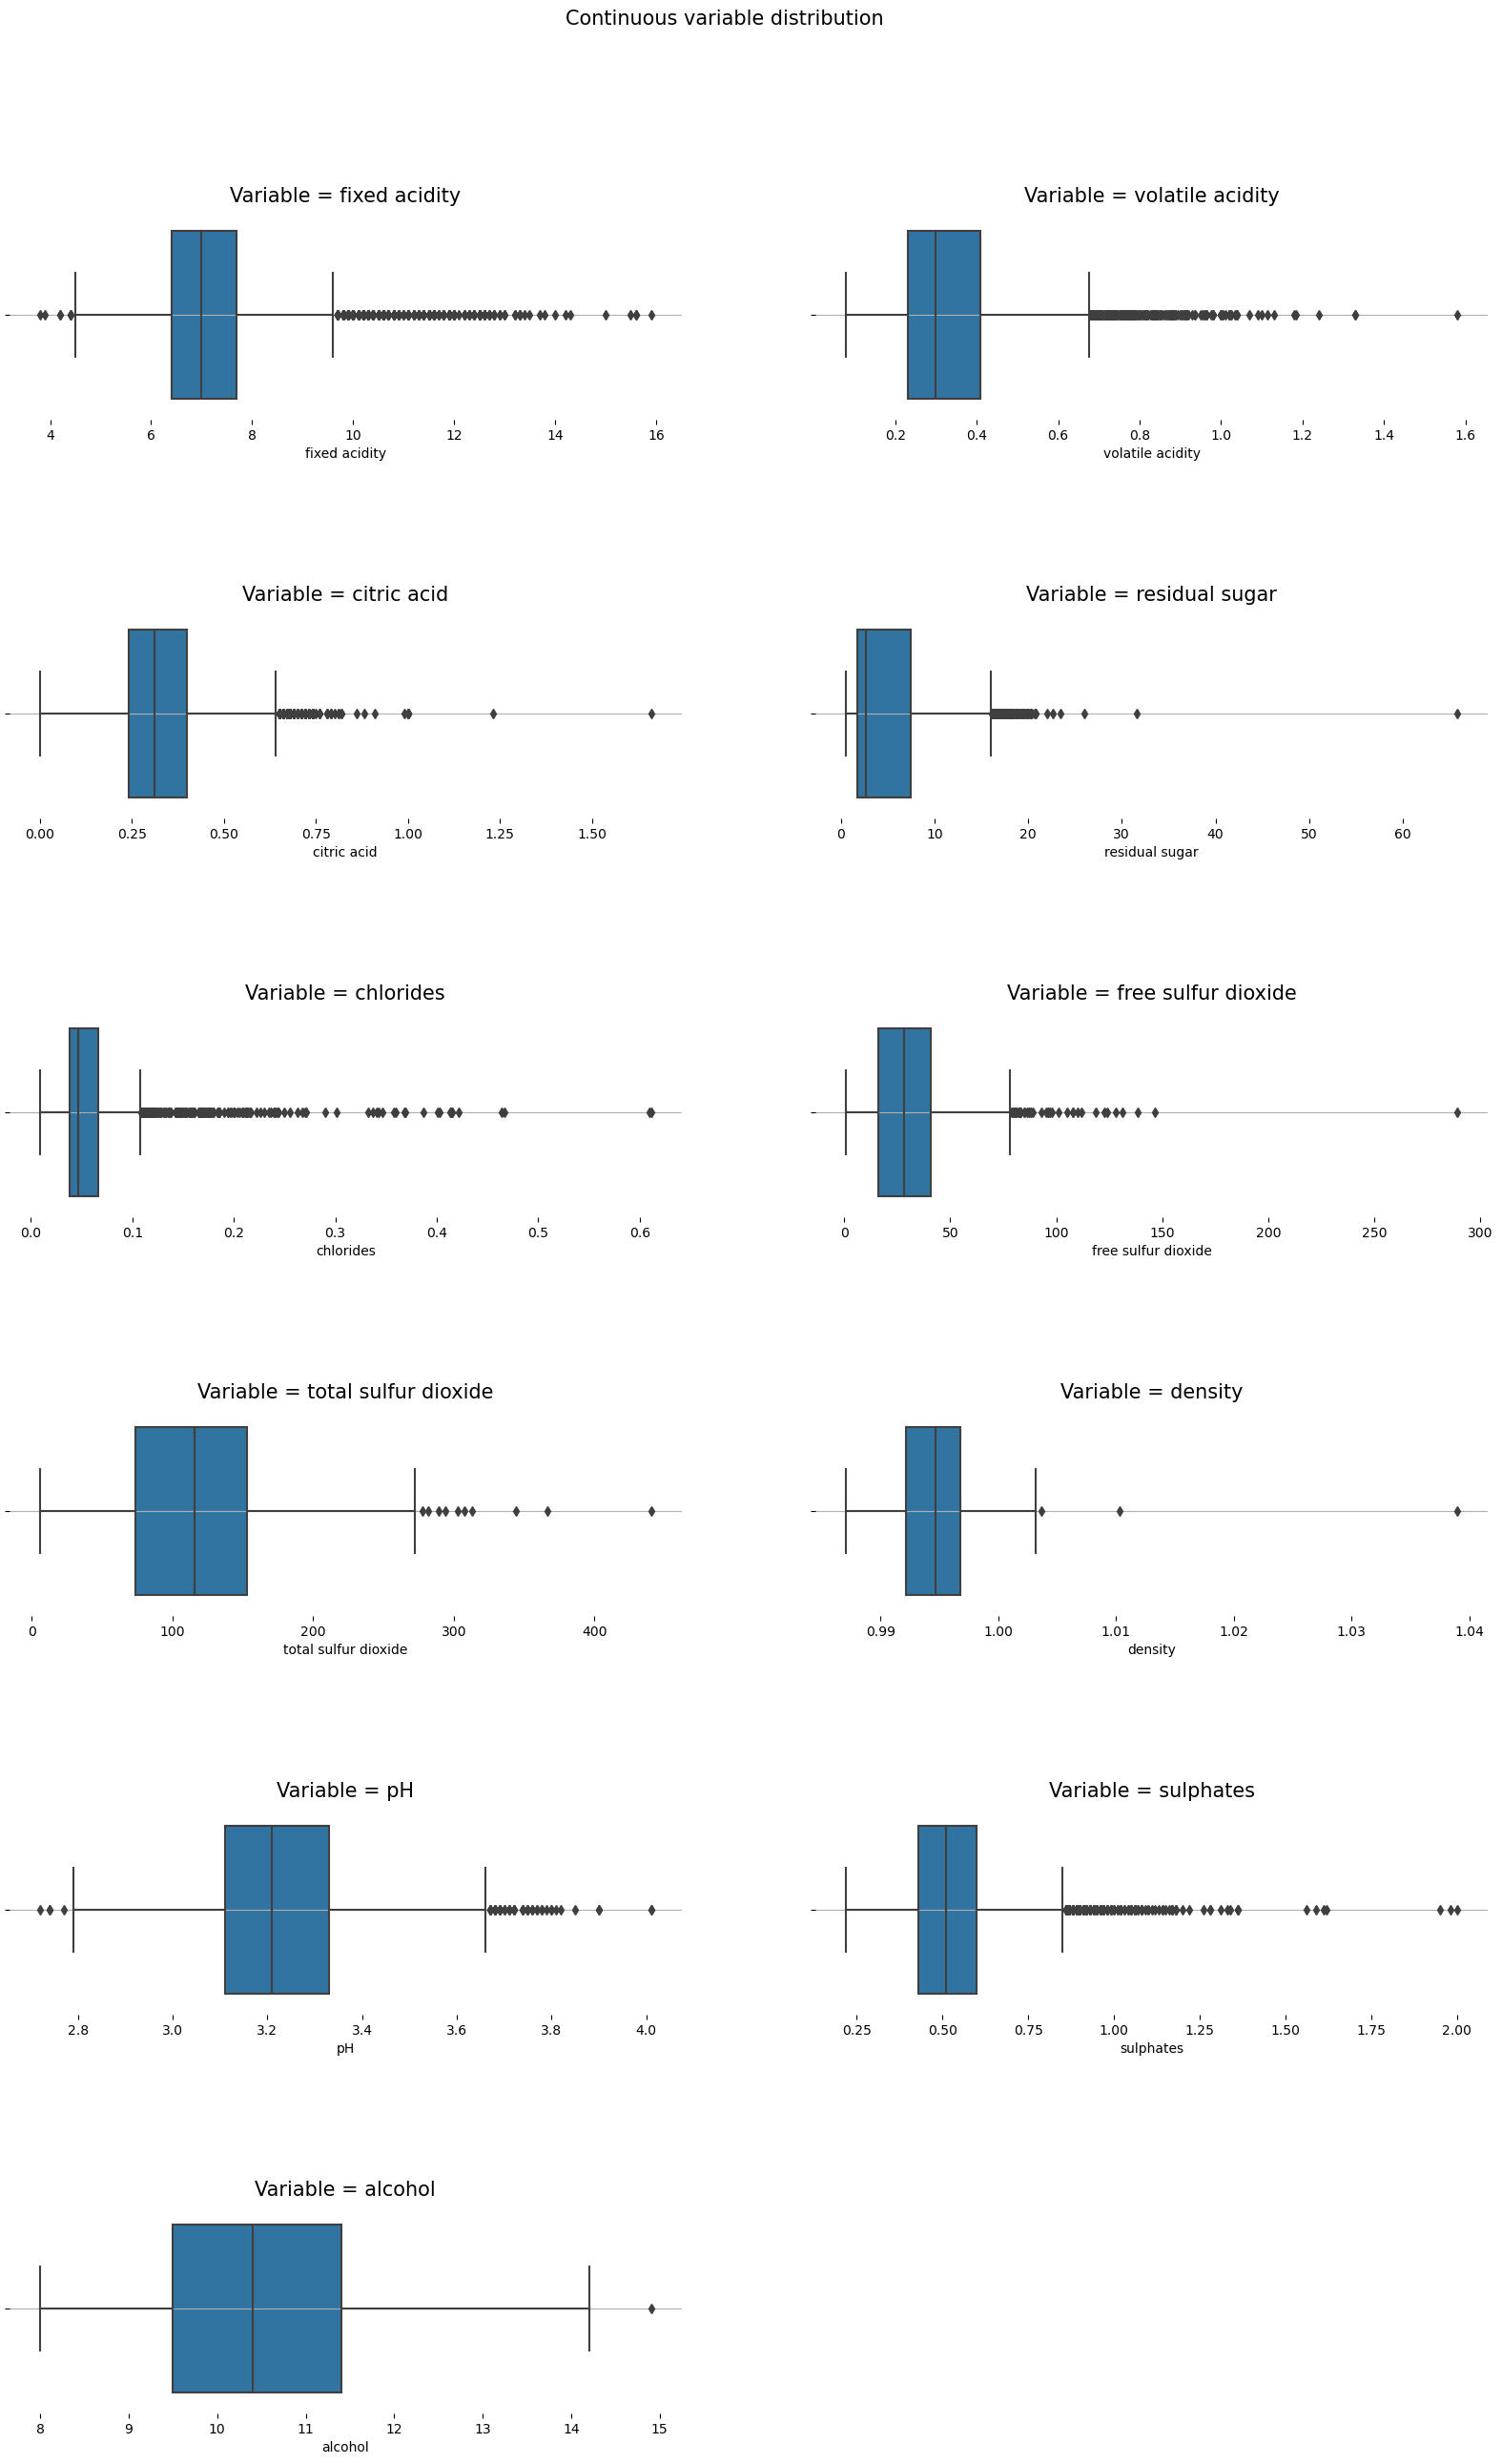

In [19]:
kdeplot_custom(df_numeric, None, 2,  "Continuous variable distribution", "boxplot")

### 4.3) Categorical variables distribution

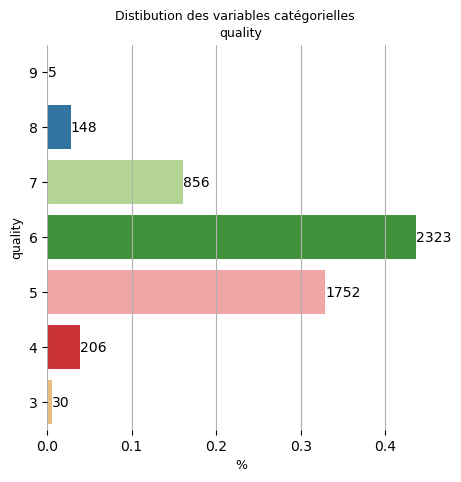

In [20]:
subplot_barplot(df_categ, 1, "Distibution des variables catégorielles")

## 5) Bivariate distribution
- 5.1 ) Target vs categorical variables
- 5.2) Target vs numeric variables
- 5.3) Bivariate statistics for numeric features

### 5.1 ) Target vs categorical variables

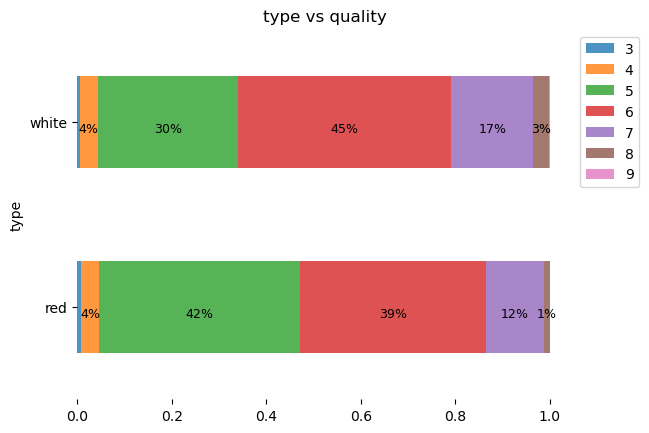

In [21]:
df_x_categ_y = pd.concat([df_categ, df_y], axis=1)
for col in df_categ.columns:
    ax = (pd.crosstab(df_x_categ_y[target], df_x_categ_y[col], normalize='index')
        .plot.barh(stacked=True, alpha=0.8, title=f'{target} vs {col}',
                  )
     )
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    # Add percentages on top of each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if width > 0.01:  # To avoid adding labels for small bars
            ax.annotate(f'{width*100:.0f}%', (x + width/2, y + height/2), ha='center', va='top', size=9)


- Quality 9 is not existant for red wine
- Nearly 81% of red wine has quality 5 and 6 vs 75% for white wine
- 65% of white wine have a quality score of 6 or higher, 52% of red wine have the top scores
- Overall, white wine has a better perceived quality than red wine

###  5.2) Target vs numeric variables

In [22]:
df_y_x_numeric = pd.concat([df_numeric, df_y], axis=1)

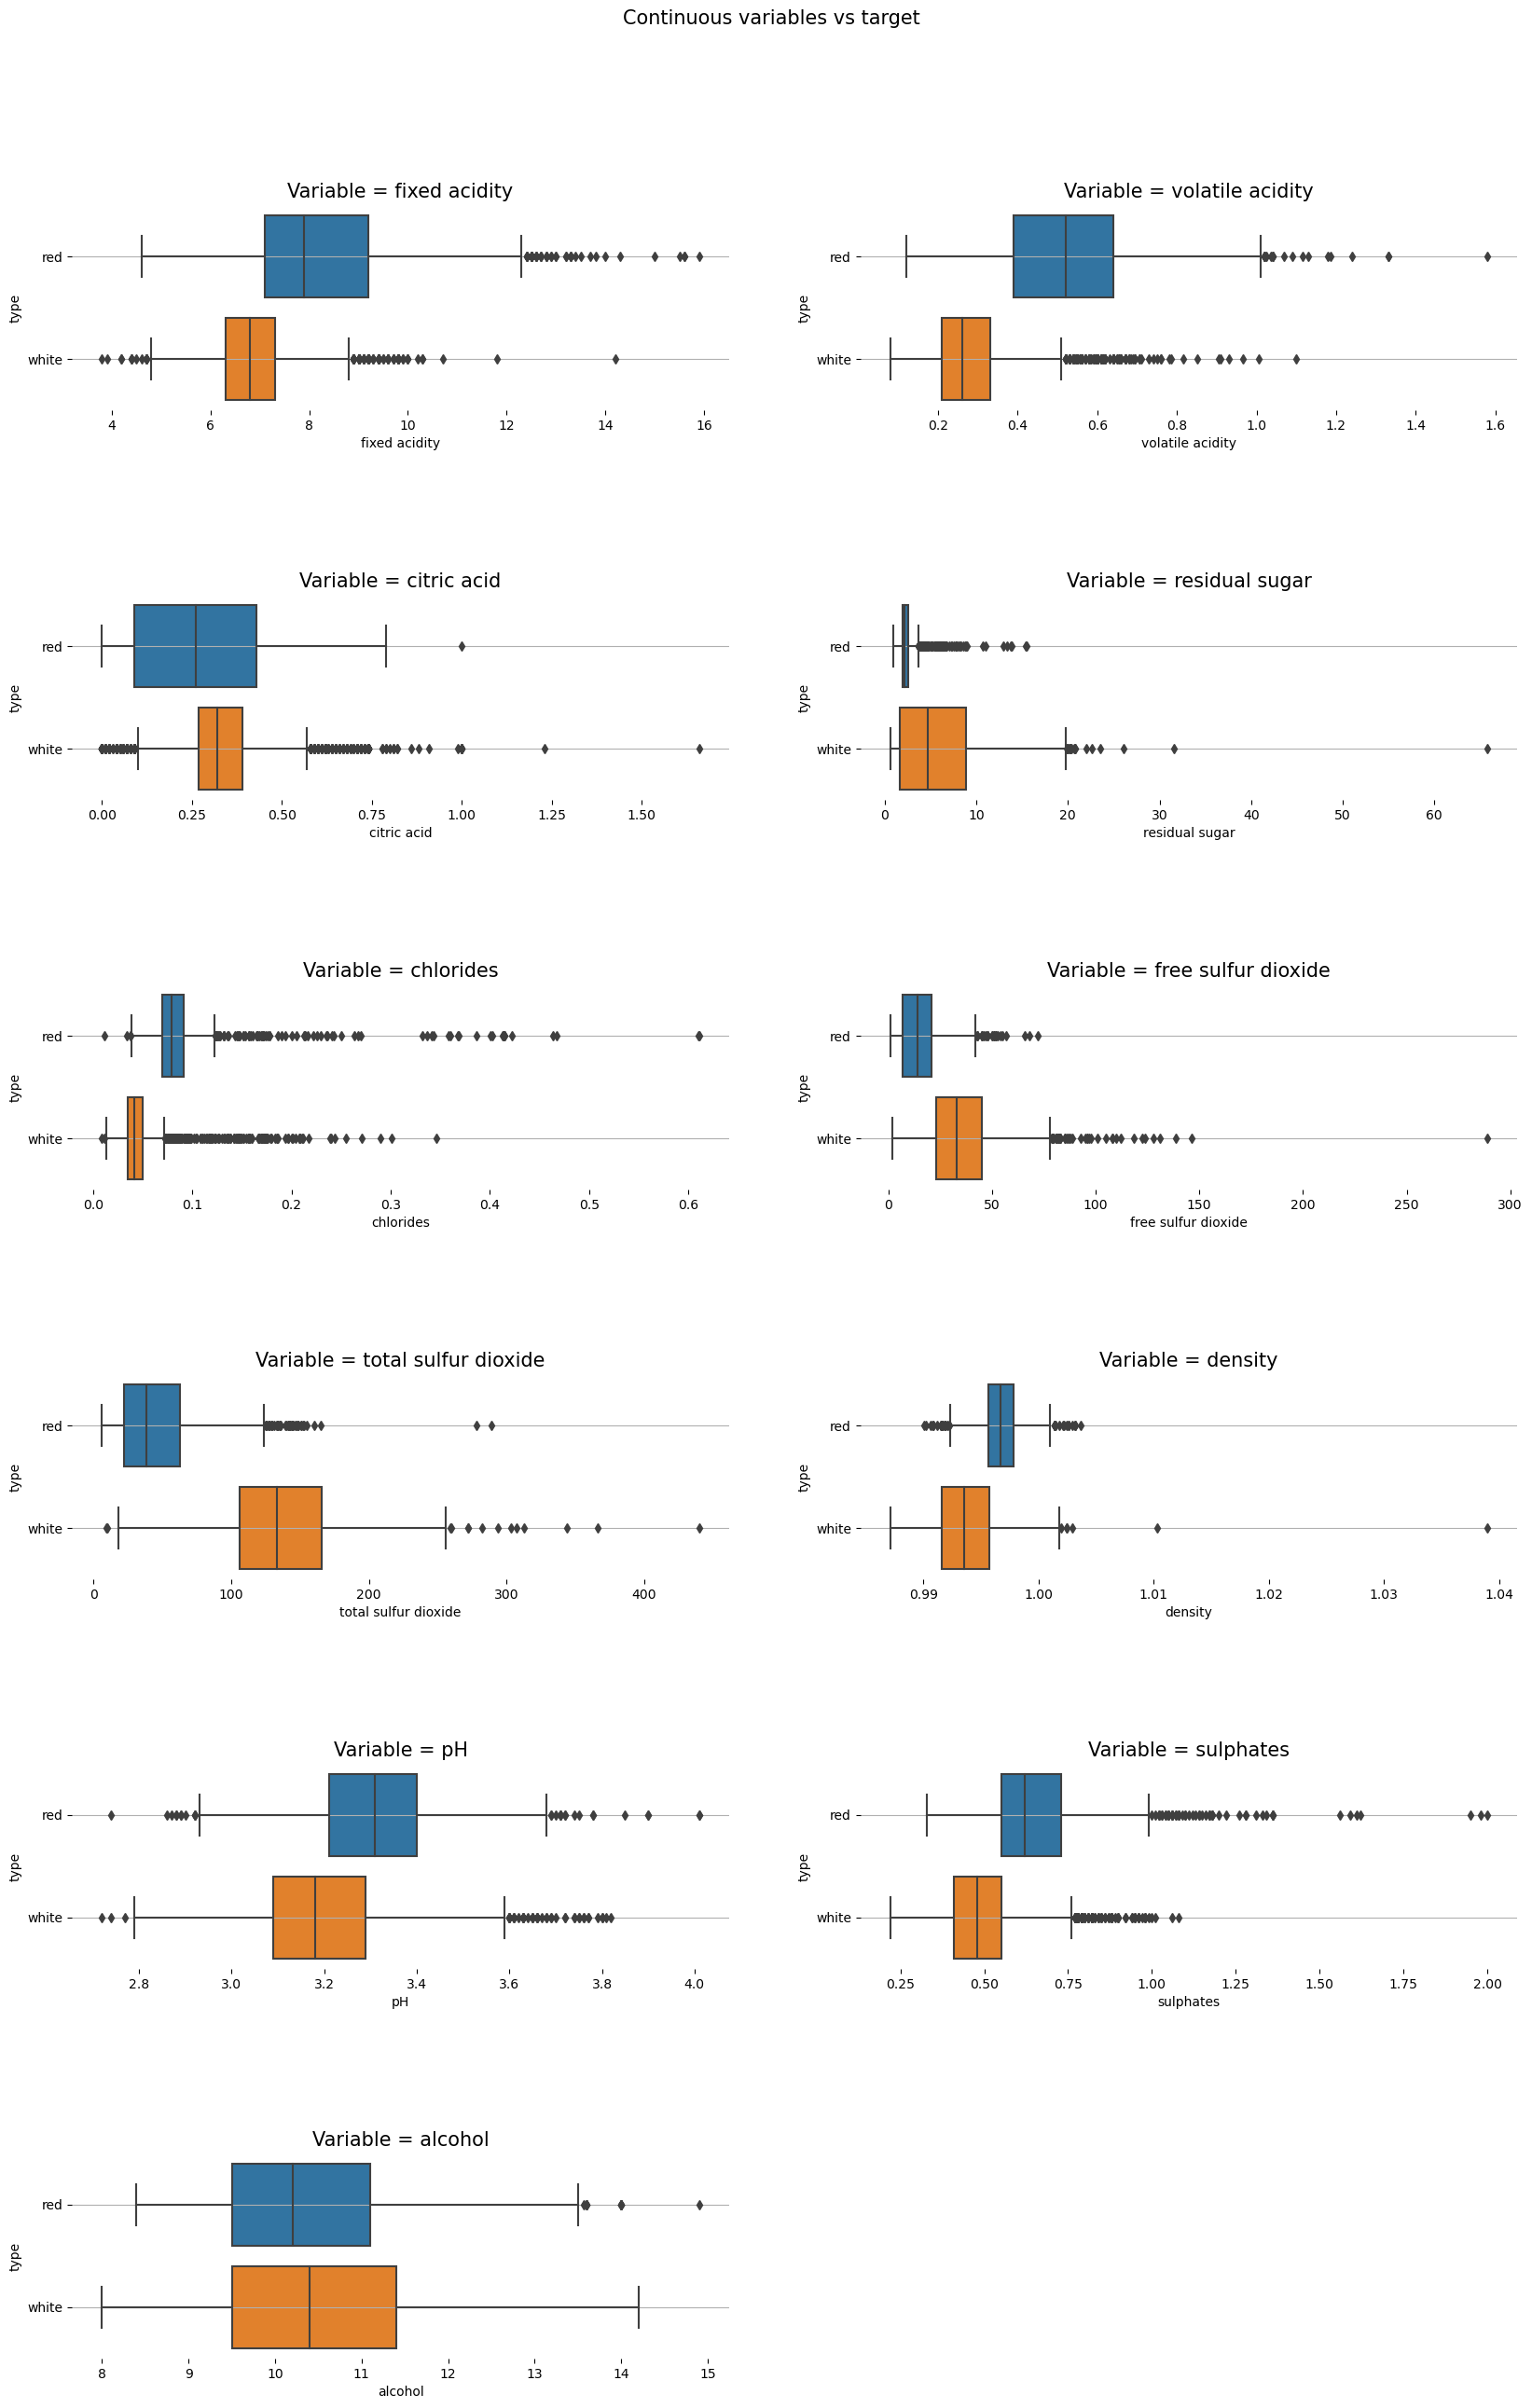

In [23]:
kdeplot_custom(df_y_x_numeric, target, 2,  "Continuous variables vs target", "boxplot")

- Red wine has greater acidity and volatily acidity than white wine
- Values of cidric acid for red wine are more disperse than for white wine
- white wine has on average more sugar, but less chlorides than red wine
- All variables seem to discreminate red and white wine

- Outliers are typically shown as individual data points beyond the "whiskers" of the box plot.
- The variables "chloride", "ph", "acidity", "volatile acidity", "sulphates" seem to have several points outside the whiskers.

### 5.3) Bivariate statistics for numeric features

In [31]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
%matplotlib inline
plot_corr_matrix(df_numeric, 'Correlation Matrix for all numerical variables')[1].show()

- According to the pearson correlatios, the most correlated numerical features are density and alcohol (-60%)

## 6) Statistical tests of dependence
- 6.1) Numeric variables vs target
- 6.2) Categorical variables vs target

###  6.1) Numeric variables vs target

In [25]:
compute_khi2_test(df_y_x_numeric, target, alpha=0.05)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

- all variables are dependent of the target

In [26]:
# Even with an alpha of 0.001, all variables are dependent of y
compute_khi2_test(df_y_x_numeric, target, alpha=0.001)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

### 6.2) Categorical variables vs target

In [27]:
df_y_x_categ = pd.concat([df_categ, df_y], axis=1)
compute_khi2_test(df_y_x_categ, target, 0.001)

['quality']

- Based on the khi2 test, all variables are dependent to the target

### Conclusions
- Peu de preprocessing à faire sur ce dataframe : Pas de valeurs manquants, peu de colonnes, corrélation de 67% au plus entre 2 variables
- Un travail sur les outliers pourrait être fait, notamment supprimer le top 99% et botton 1%, ou remplacer par la médiane
- Toutes les variables ont une distribution différente (moyenne, cut 25%, cut 75%, min, max) si on compare les valeurs pour le vin rouge et le vin blanc
- Le vin blanc a une qualité (perçue) plus importante que le vin rouge